In [2]:
%config Completer.use_jedi = False

**Question 1: Given some sample data, write a program to answer the following: click here to access the required data set. On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.**

In [20]:
import pandas as pd

In [34]:
data = pd.read_csv('data.csv')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


**a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

First let's understand how the AOV was calculated.

In [6]:
data['order_amount'].mean()

3145.128

The average order amount was naively calculated as the average over orders. However, this number is much higher than we would expect based on the preview of the table, which should probably be somewhere between 200 and 300.

In [28]:
import seaborn as sns

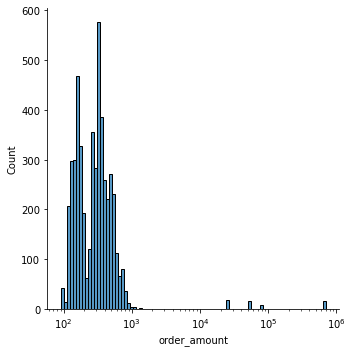

In [32]:
sns.displot(data['order_amount'], log_scale=True)

There are purchases with order amounts of almost one million dollars. The data is skewed far to the right, causing the mean to far exceed the median.

**b) What metric would you report for this dataset?**

This depends on what we are interested in knowing about. If we want to summarize the central tendency of the amount of money spent per transaction, a more realistic measure would be to report the median order value.

The median is computed based only on the *order* of the data, and is not impacted by the actual *value* of the data. This lets us avoid the problem of outliers with high values.

**c) What is its value?**

In [35]:
data['order_amount'].median()

284.0

**Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.**

**a) How many orders were shipped by Speedy Express in total?**

Join Orders and Shippers to get Shipper name. Select rows with name matching 'Speedy Express' and use COUNT to count rows.

```sql
SELECT COUNT(*) FROM 
Orders
INNER JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';
```

```
54 
```

**b) What is the last name of the employee with the most orders?**

First count orders by Employee ID and rename as NumOrders. Next join Employee ID on employee table to get last names. Finally, order by NumOrders in descending order, and grab the LastName from the top 1 row.

```sql
SELECT TOP 1, Employees.LastName
FROM 
    (SELECT EmployeeID, COUNT(*) as NumOrders
    From Orders
    GROUP BY EmployeeID) AS EmpOrders
INNER JOIN Employees 
ON EmpOrders.EmployeeID = Employees.EmployeeID
ORDER BY NumOrders DESC
```

**c) What product was ordered the most by customers in Germany?**


Product Name and Country need to be linked. I need to link the Product Table to the Customer Table through the Orders Table.

This query just involves linking the keys from Products -> OrderDetails -> Orders -> Customers. We do this using a series of Inner Joins. Next select only orders made by customers in Germany. Count by ProductName and sort in descending order. Finally, grab the ProductName from the top row.

```sql
SELECT TOP 1, ProductName
FROM
    (SELECT Products.ProductName, COUNT(*) AS Num
    FROM 
        (((Products
        INNER JOIN OrderDetails
        ON Products.ProductID = OrderDetails.ProductID)
        INNER JOIN Orders
        ON OrderDetails.OrderID = Orders.OrderID)
        INNER JOIN Customers
        ON Orders.CustomerID = Customers.CustomerID)
        WHERE Customers.Country = 'Germany'
    GROUP BY Products.ProductName)
ORDER BY Num DESC
  
```

```
Gorgonzola Telino 
```